In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm 
import seaborn as sns

In [2]:
# Read the CSV file
online_retail = pd.read_csv('Online Retail.csv', encoding_errors='ignore')

# Convert the date column to datetime format
online_retail['InvoiceDate'] = pd.to_datetime(online_retail['InvoiceDate'])

# Add the day of the week in the format 'ddd' (e.g., 'Mon', 'Tue', etc.)
online_retail['Day of the Week'] = online_retail['InvoiceDate'].dt.day_name()
online_retail['Month'] = online_retail['InvoiceDate'].dt.month_name()

#Separted Date and Time
online_retail['InvoiceTime'] = online_retail['InvoiceDate'].dt.time
online_retail['InvoiceDate'] = online_retail['InvoiceDate'].dt.date

# Add Cancel column to identify is invoice has been cancelled
online_retail['Cancelled'] = online_retail['InvoiceNo'][0] == 'C'
online_retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day of the Week,Month,InvoiceTime,Cancelled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,Wednesday,December,08:26:00,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,Wednesday,December,08:26:00,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,Wednesday,December,08:26:00,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,Wednesday,December,08:26:00,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,Wednesday,December,08:26:00,False
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680.0,France,Friday,December,12:50:00,False
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France,Friday,December,12:50:00,False
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France,Friday,December,12:50:00,False
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France,Friday,December,12:50:00,False


In [3]:
#
online_retail['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [4]:
online_retail.dropna(subset=['Country'], inplace=True)
online_retail['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [5]:
#dropping 'Unspecified', 'European Community'
online_retail = online_retail[~online_retail['Country'].isin(('Unspecified', 'European Community'))]
online_retail['Country'].unique()
online_retail


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day of the Week,Month,InvoiceTime,Cancelled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,Wednesday,December,08:26:00,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,Wednesday,December,08:26:00,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,Wednesday,December,08:26:00,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,Wednesday,December,08:26:00,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,Wednesday,December,08:26:00,False
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680.0,France,Friday,December,12:50:00,False
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France,Friday,December,12:50:00,False
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France,Friday,December,12:50:00,False
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France,Friday,December,12:50:00,False


In [6]:
#Drop description and stockcode
online_retail.drop('Description', axis='columns', inplace=True)
#online_retail.add('StockCode', axis='columns', inplace=True)
online_retail


C:\Users\Prisc\AppData\Local\Temp\ipykernel_20636\126934565.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online_retail.drop('Description', axis='columns', inplace=True)


,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day of the Week,Month,InvoiceTime,Cancelled
0,536365,85123A,6,2010-12-01,2.55,17850.0,United Kingdom,Wednesday,December,08:26:00,False
1,536365,71053,6,2010-12-01,3.39,17850.0,United Kingdom,Wednesday,December,08:26:00,False
2,536365,84406B,8,2010-12-01,2.75,17850.0,United Kingdom,Wednesday,December,08:26:00,False
3,536365,84029G,6,2010-12-01,3.39,17850.0,United Kingdom,Wednesday,December,08:26:00,False
4,536365,84029E,6,2010-12-01,3.39,17850.0,United Kingdom,Wednesday,December,08:26:00,False
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,12,2011-12-09,0.85,12680.0,France,Friday,December,12:50:00,False
541905,581587,22899,6,2011-12-09,2.10,12680.0,France,Friday,December,12:50:00,False
541906,581587,23254,4,2011-12-09,4.15,12680.0,France,Friday,December,12:50:00,False
541907,581587,23255,4,2011-12-09,4.15,12680.0,France,Friday,December,12:50:00,False


In [7]:
online_retail['Total'] = online_retail['UnitPrice'] * online_retail['Quantity']
#total = online_retail.groupby('InvoiceNo')['Total'].sum().reset_index()
online_retail
#pd.merge(total, online_retail.drop(['Quantity', 'UnitPrice'], axis='columns').drop_duplicates(), on='InvoiceNo', how='inner')

C:\Users\Prisc\AppData\Local\Temp\ipykernel_20636\284993697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online_retail['Total'] = online_retail['UnitPrice'] * online_retail['Quantity']


,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day of the Week,Month,InvoiceTime,Cancelled,Total
0,536365,85123A,6,2010-12-01,2.55,17850.0,United Kingdom,Wednesday,December,08:26:00,False,15.30
1,536365,71053,6,2010-12-01,3.39,17850.0,United Kingdom,Wednesday,December,08:26:00,False,20.34
2,536365,84406B,8,2010-12-01,2.75,17850.0,United Kingdom,Wednesday,December,08:26:00,False,22.00
3,536365,84029G,6,2010-12-01,3.39,17850.0,United Kingdom,Wednesday,December,08:26:00,False,20.34
4,536365,84029E,6,2010-12-01,3.39,17850.0,United Kingdom,Wednesday,December,08:26:00,False,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,12,2011-12-09,0.85,12680.0,France,Friday,December,12:50:00,False,10.20
541905,581587,22899,6,2011-12-09,2.10,12680.0,France,Friday,December,12:50:00,False,12.60
541906,581587,23254,4,2011-12-09,4.15,12680.0,France,Friday,December,12:50:00,False,16.60
541907,581587,23255,4,2011-12-09,4.15,12680.0,France,Friday,December,12:50:00,False,16.60


In [168]:
#group
group_customers = online_retail.groupby(['InvoiceNo', 'CustomerID', 'InvoiceDate', 'InvoiceTime', 'Country', 'Day of the Week','Cancelled','Month'], group_keys=True)[['Country','Total', 'Quantity']].sum(lambda x: x)
group_customers



,,,Total
InvoiceDate,Day of the Week,Month,
2010-12-01,Wednesday,December,46051.26
2010-12-02,Thursday,December,45775.43
2010-12-03,Friday,December,22598.46
2010-12-05,Sunday,December,31380.60
2010-12-06,Monday,December,30465.08
...,...,...,...
2011-12-05,Monday,December,56634.53
2011-12-06,Tuesday,December,43659.20
2011-12-07,Wednesday,December,68991.27


In [9]:
group_customers.groupby('Country')['Total'].describe()


,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Australia,69.0,1986.627101,4982.065565,-425.00,81.6000,358.250,608.7600,22775.93
Austria,19.0,534.437895,415.145027,-24.20,204.4200,484.860,725.0100,1542.08
Bahrain,2.0,274.200000,261.912352,89.00,181.6000,274.200,366.8000,459.40
Belgium,119.0,343.789580,308.091419,-48.85,144.5800,300.760,478.5200,1491.59
Brazil,1.0,1143.600000,NaN,1143.60,1143.6000,1143.600,1143.6000,1143.60
Canada,6.0,611.063333,495.163105,51.56,238.9650,542.590,1016.3300,1217.64
Channel Islands,33.0,608.675455,614.548939,-293.00,74.9000,363.530,1103.1500,2060.03
Cyprus,20.0,647.314500,815.383914,-320.69,120.0375,390.790,981.1225,2876.85
Czech Republic,5.0,141.544000,266.992031,-57.51,-57.5100,-4.000,277.4800,549.26


<Axes: xlabel='Total', ylabel='Country'>

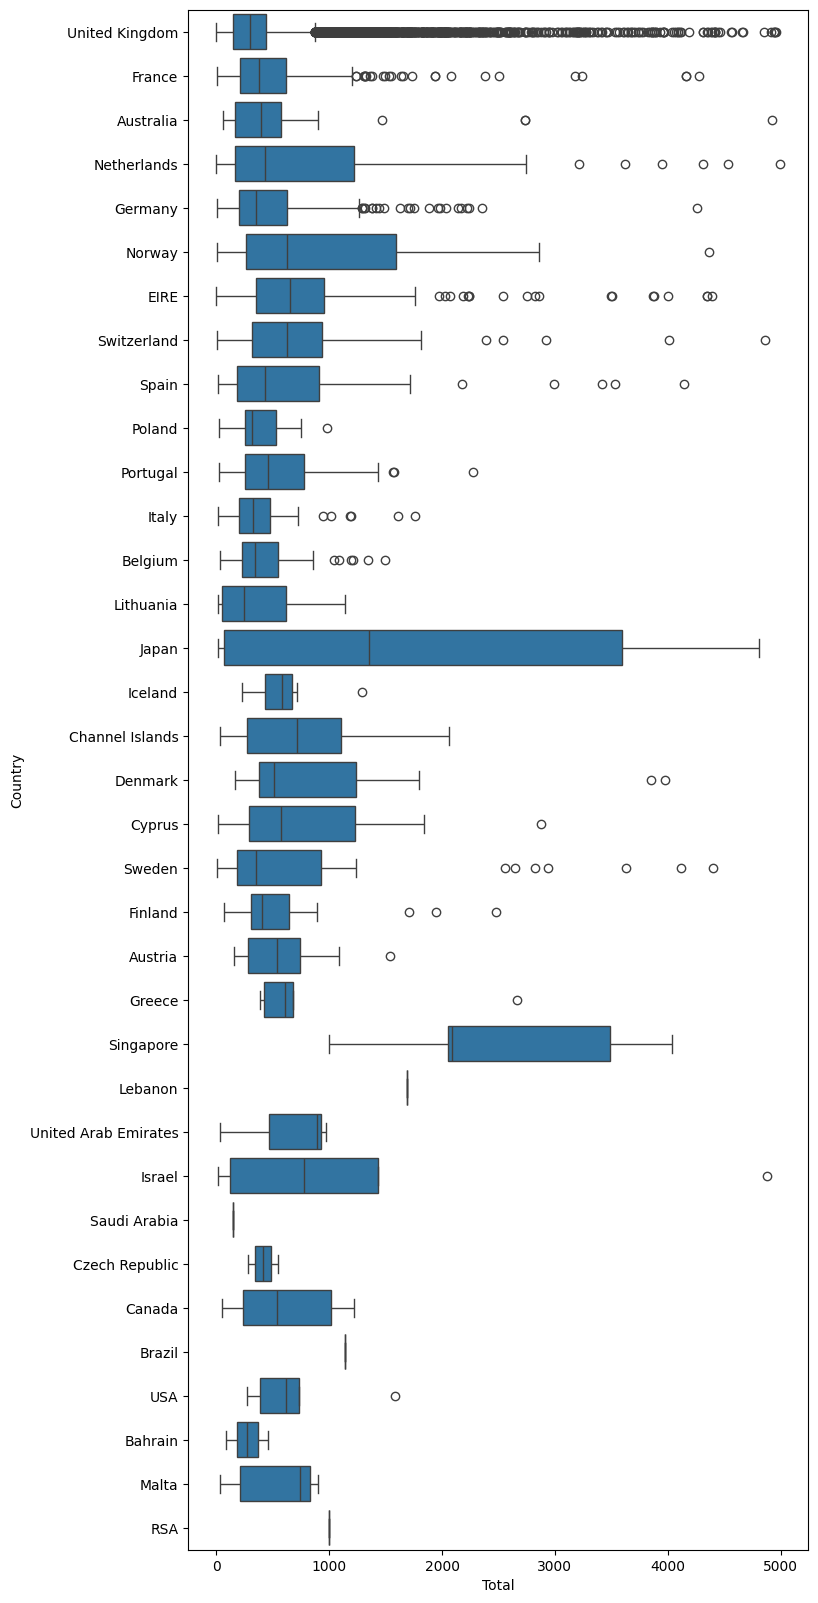

In [10]:
df = group_customers
filtered_df = df[(df['Total'] <= 5000) & (df['Total'] >= -000)]
plt.figure(figsize=(8, 20))
sns.boxplot(x = 'Total', y = 'Country', data = filtered_df, orient = 'h')

In [169]:
g_c =group_customers.reset_index()
group_month_day = g_c.groupby(['InvoiceDate','Day of the Week', 'Month'],group_keys=True)[['Total']].sum(lambda x: x)
group_month_day

,,,Total
InvoiceDate,Day of the Week,Month,
2010-12-01,Wednesday,December,46051.26
2010-12-02,Thursday,December,45775.43
2010-12-03,Friday,December,22598.46
2010-12-05,Sunday,December,31380.60
2010-12-06,Monday,December,30465.08
...,...,...,...
2011-12-05,Monday,December,56634.53
2011-12-06,Tuesday,December,43659.20
2011-12-07,Wednesday,December,68991.27


In [171]:
group_month_day = group_month_day.reset_index()

In [64]:
group_customers.reset_index()['Day of the Week'].unique()

array(['Wednesday', 'Thursday', 'Friday', 'Sunday', 'Monday', 'Tuesday'],
      dtype=object)

In [172]:
one_hot_online_retail = pd.get_dummies(group_month_day.reset_index(), columns=['Day of the Week', 'Month'], dtype=float)
one_hot_online_retail.columns

Index(['index', 'InvoiceDate', 'Total', 'Day of the Week_Friday',
       'Day of the Week_Monday', 'Day of the Week_Sunday',
       'Day of the Week_Thursday', 'Day of the Week_Tuesday',
       'Day of the Week_Wednesday', 'Month_April', 'Month_August',
       'Month_December', 'Month_February', 'Month_January', 'Month_July',
       'Month_June', 'Month_March', 'Month_May', 'Month_November',
       'Month_October', 'Month_September'],
      dtype='object')

In [123]:
[column for column in one_hot_online_retail.columns if column.startswith('Day of the Week') or column.startswith('Month')]

['Day of the Week_Friday',
 'Day of the Week_Monday',
 'Day of the Week_Sunday',
 'Day of the Week_Thursday',
 'Day of the Week_Tuesday',
 'Day of the Week_Wednesday',
 'Month_April',
 'Month_August',
 'Month_December',
 'Month_February',
 'Month_January',
 'Month_July',
 'Month_June',
 'Month_March',
 'Month_May',
 'Month_November',
 'Month_October',
 'Month_September']

In [173]:
import statsmodels.api as sm

X = one_hot_online_retail[[column for column in one_hot_online_retail.columns if column.startswith('Day of the Week') or column.startswith('Month')]]
y = one_hot_online_retail['Total']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

In [175]:


model.predict(sm.add_constant([X.iloc[0]]))

array([33304.89526657])

In [103]:
X = one_hot_online_retail[[column for column in one_hot_online_retail.columns if column.startswith('Day of the Week') or column.startswith('Month')]]

X

,Day of the Week_Friday,Day of the Week_Monday,Day of the Week_Sunday,Day of the Week_Thursday,Day of the Week_Tuesday,Day of the Week_Wednesday,Month_April,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541397,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
541398,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
541399,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
541400,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [185]:
days_of_the_week = group_customers.reset_index()['Day of the Week'].unique()
months = group_customers.reset_index()['Month'].unique()

from itertools import product

df = pd.DataFrame([{'const': 1, 'Day of the Week': day, 'Month': month} for day, month in product(days_of_the_week, months)])
df = pd.get_dummies(df, columns=['Day of the Week', 'Month'], dtype=float)

In [186]:
model.predict(df)

0     33304.895267
1     21682.930358
2     20077.587441
3     22853.220611
4     21490.510016
          ...     
67    25633.349492
68    26569.819318
69    38645.116355
70    41004.464403
71    46437.925856
Length: 72, dtype: float64

<BarContainer object of 72 artists>

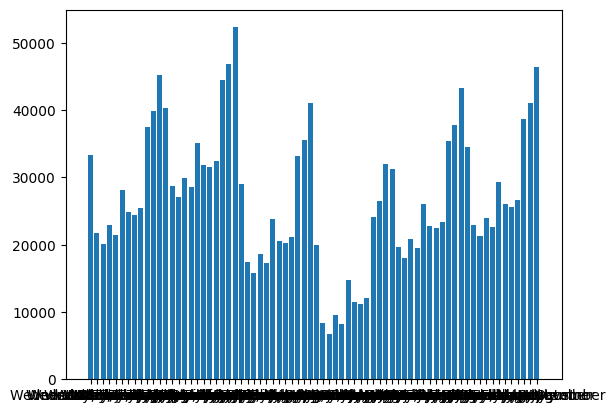

In [178]:
plt.bar([f'{day}, {month}' for day, month in product(days_of_the_week, months)], model.predict(df))

In [179]:
df = pd.DataFrame([{'const': 1, 'Day of the Week': day, 'Month': month} for day, month in product(days_of_the_week, months)])
df_oh = pd.get_dummies(df, columns=['Day of the Week', 'Month'], dtype=float)

In [180]:
df_oh[df['Month'] == 'January']

,const,Day of the Week_Friday,Day of the Week_Monday,Day of the Week_Sunday,Day of the Week_Thursday,Day of the Week_Tuesday,Day of the Week_Wednesday,Month_April,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<BarContainer object of 6 artists>

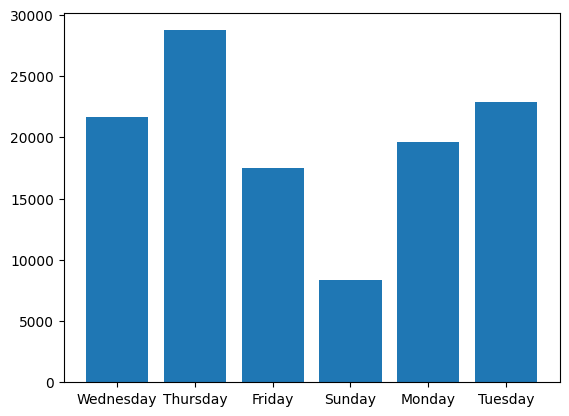

In [181]:
df_oh[df['Month'] == 'January']

result = model.predict(df_oh[df['Month'] == 'January'])

plt.bar(df[df['Month'] == 'January']['Day of the Week'], result)

<BarContainer object of 12 artists>

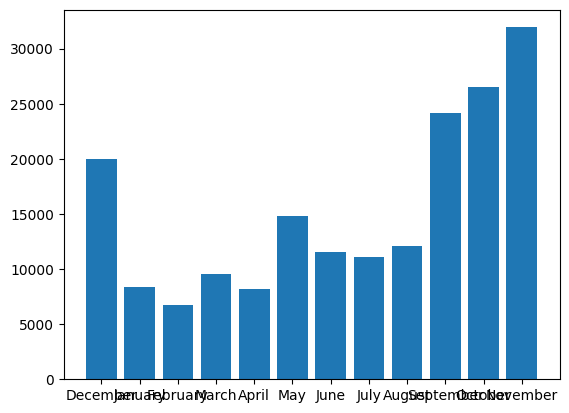

In [182]:
df_oh[df['Month'] == 'January']

result = model.predict(df_oh[df['Day of the Week'] == 'Sunday'])

plt.bar(df[df['Day of the Week'] == 'Sunday']['Month'], result)

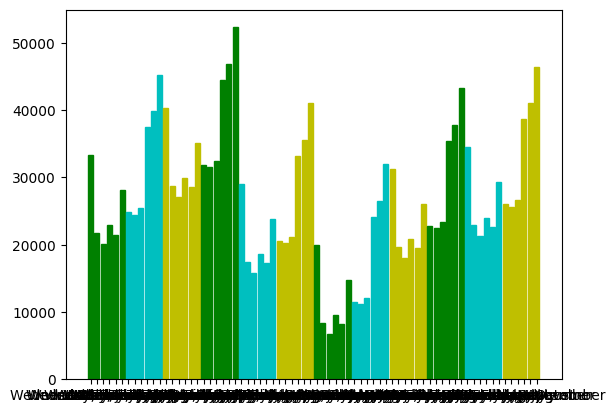

In [189]:
barlist = plt.bar([f'{day}, {month}' for day, month in product(days_of_the_week, months)], model.predict(df))

colors = ['g', 'c','y']

for i in range(12):
    for j in range(6):
        barlist[i*6+j].set_color(colors[i % len(colors)])

plt.show()

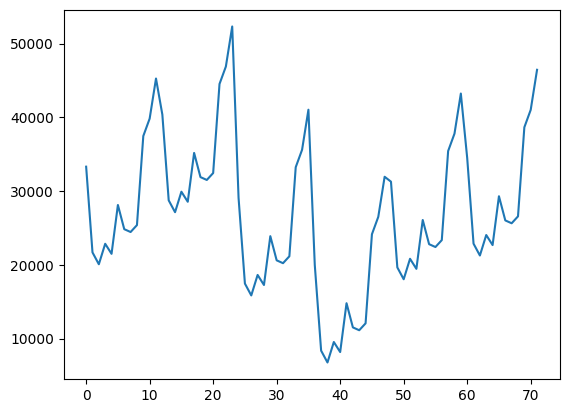

In [188]:
plt.plot(model.predict(df))


In [190]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Total   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     15.72
Date:                Wed, 19 Jun 2024   Prob (F-statistic):           8.60e-31
Time:                        18:26:29   Log-Likelihood:                -3262.9
No. Observations:                 305   AIC:                             6560.
Df Residuals:                     288   BIC:                             6623.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      2.147e+04    506.669     42.375      0.000    2.05e+04    2.25e+04
Day of the Week_Friday     1241.6198   1425.444      0.871      0.384   -1563.989    4047.229
Day of the Week_Monday     3433.0211   1463.812      2.345      0.020     551.894    6314.148
Day of the Week_Sunday    -7847.5737   1425.999     -5.503      0.000   -1.07e+04   -5040.873
Day of the Week_Thursday   1.252e+04   1391.299      9.001      0.000    9785.254    1.53e+04
Day of the Week_Tuesday    6653.0475   1402.279      4.744      0.000    3893.033    9413.062
Day of the Week_Wednesday  5466.5521   1390.520      3.931      0.000    2729.682    8203.422
Month_April               -5446.3678   2289.096     -2.379      0.018   -9951.848    -940.888
Month_August              -1553.5539   2073.337     -0.749      0.454   -5634.368    2527.261
Month_December             6368.0174   2005.326      3.176      0.002    2421.064    1.03e+04
Month_February            -6859.2904   2150.574     -3.190      0.002   -1.11e+04   -2626.455
Month_January             -5253.9475   2150.574     -2.443      0.015   -9486.783   -1021.112
Month_July                -2490.0237   2074.072     -1.201      0.231   -6572.285    1592.238
Month_June                -2103.6982   2073.230     -1.015      0.311   -6184.303    1976.907
Month_March               -4083.6572   2037.587     -2.004      0.046   -8094.107     -73.207
Month_May                  1175.4601   2112.455      0.556      0.578   -2982.348    5333.268
Month_November             1.831e+04   2073.337      8.833      0.000    1.42e+04    2.24e+04
Month_October              1.288e+04   2074.525      6.209      0.000    8797.937     1.7e+04
Month_September            1.052e+04   2073.663      5.074      0.000    6440.287    1.46e+04
==============================================================================
Omnibus:                       91.121   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              368.816
Skew:                           1.212   Prob(JB):                     8.18e-81
Kurtosis:                       7.811   Cond. No.                     5.86e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.11e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""